### Multiple Linear Regression Analysis on Red Wine Astriingency



This dataset contains measurements of the tannin content and astringency for 37 red wines. The dataset has three columns:

* `MCP`: the tannin content (g/L) as measured with the methyl cellulose-based method.
    
* `HA`: the tannin content (g/L) as measured with the bovine serum albumin-based method.
    
* `astringency`: astringency as assessed by expert tasters, on a scale from 1 to 9.

This dataset is from the paper "Red wine astringency: Correlations between chemical and sensory features" by Pavez et al. in *LWT - Food Science and Technology* (2022)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm

# data input
winesdata = pd.read_csv('wines.csv')
print(winesdata.head())

    MCP    HA  astringency
0  0.56  0.11          4.1
1  1.60  0.28          5.2
2  1.35  0.37          6.8
3  0.52  0.10          4.5
4  2.65  0.21          4.1


**Scatterplot on MCP and Astringency Values**


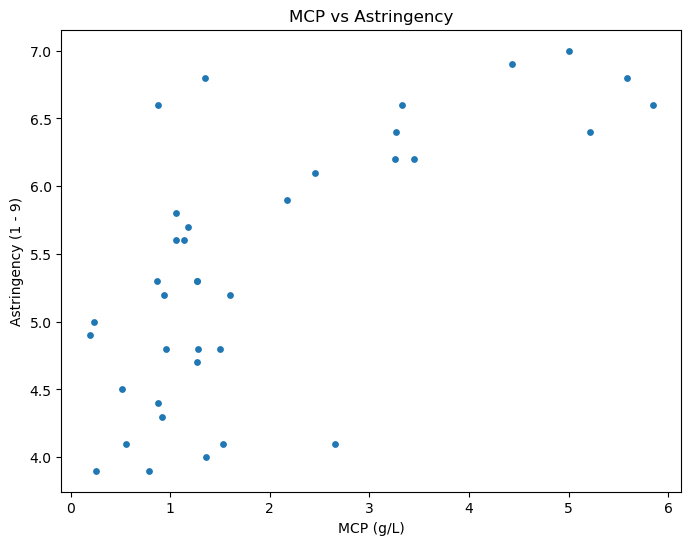

In [2]:
MCP = winesdata['MCP']
astringency = winesdata['astringency']
plt.figure(figsize=(8,6))
plt.scatter(MCP,astringency,s=15)
plt.title("MCP vs Astringency")
plt.xlabel("MCP (g/L)")
plt.ylabel("Astringency (1 - 9)")
plt.show()

**Case 1:
Simple linear regression of Astringency on MCP**

R-squared: 0.477
Equation of the line: Astringency = 4.577 + 0.426 * MCP  + Error


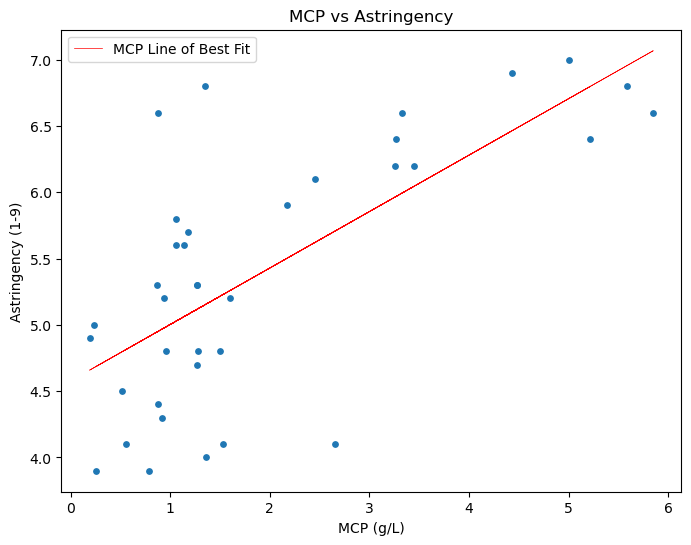

In [3]:
X = pd.DataFrame({'intercept': np.ones(winesdata.shape[0]),
                  'MCP': winesdata['MCP']})
y = winesdata['astringency']
model = sm.OLS(y, X).fit()  # Fit the linear regression model
slope, intercept = model.params['MCP'], model.params['intercept']
plt.figure(figsize=(8,6))
plt.scatter(MCP,astringency,s=15)
plt.plot(winesdata['MCP'], slope * winesdata['MCP'] + intercept, color='red', linewidth=0.5, label='MCP Line of Best Fit')
plt.title("MCP vs Astringency")
plt.xlabel("MCP (g/L)")
plt.ylabel("Astringency (1-9)")
plt.legend()
print(f"R-squared: {model.rsquared:.3f}")
print(f"Equation of the line: Astringency = {intercept:.3f} + {slope:.3f} * MCP " +  " + Error")

**Residual Plot (MCP vs Residuals)**

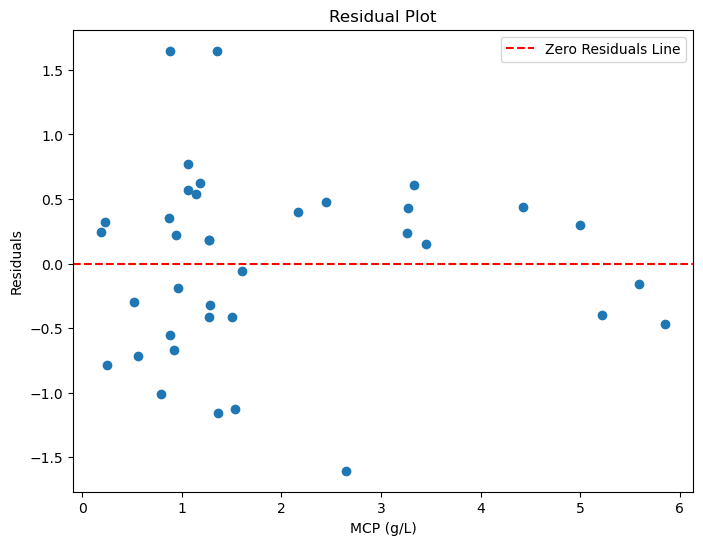

In [4]:
residuals = model.resid
plt.figure(figsize=(8, 6))
plt.scatter(MCP,residuals,marker = 'o')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.xlabel('MCP (g/L)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

**Case 2:
Simple linear regression of Astringency on Log(MCP)**

R-squared: 0.422
Equation of the line: Astringency = 5.152 + 0.739 * Ln_MCP  + Error


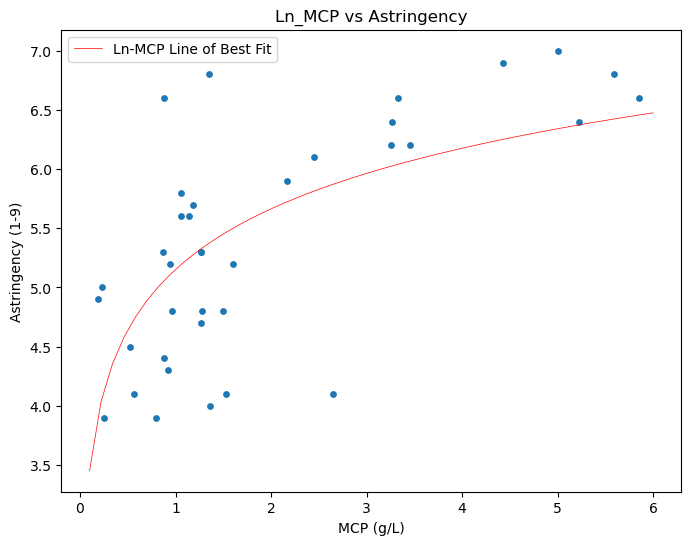

In [5]:
ln_MCP = np.log(MCP)
X_1 = pd.DataFrame({'intercept': np.ones(winesdata.shape[0]),
                  'Ln_MCP': ln_MCP})
y_1 = winesdata['astringency']


model_1 = sm.OLS(y_1, X_1).fit()  # Fit the linear regression model
slope_1, intercept_1 = model_1.params['Ln_MCP'], model_1.params['intercept']
print(f"R-squared: {model_1.rsquared:.3f}")
print(f"Equation of the line: Astringency = {intercept_1:.3f} + {slope_1:.3f} * Ln_MCP " + " + Error")


X_log = np.linspace(0.1,6)
MCP = winesdata['MCP']
astringency = winesdata['astringency']
plt.figure(figsize=(8, 6))
plt.scatter(MCP,astringency,s=15)
plt.plot(X_log, (slope_1 * np.log(X_log)) + intercept_1, color='red', linewidth=0.5, label='Ln-MCP Line of Best Fit')
plt.title("Ln_MCP vs Astringency")
plt.xlabel("MCP (g/L)")
plt.ylabel("Astringency (1-9)")
plt.legend()
plt.show()


**Residual Plot (Log MCP vs Residuals)**

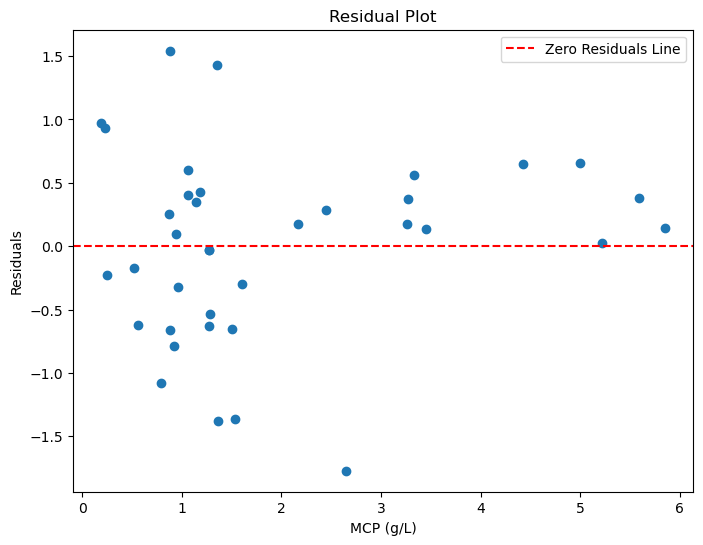

In [6]:
residuals = model_1.resid
plt.figure(figsize=(8, 6))
plt.scatter(MCP,residuals,marker = 'o')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.xlabel('MCP (g/L)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

**Case 3:
Simple linear regression of Exp(Astringency) on MCP**

Equation of the line: Exp (Astringency) = 54.501 + 147.404 * MCP  + Error
R-squared: 0.579


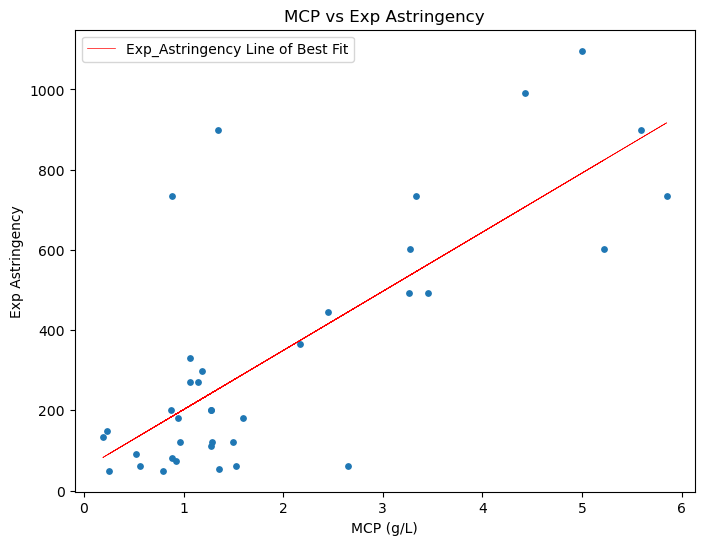

In [7]:
X_2 = pd.DataFrame({'intercept': np.ones(winesdata.shape[0]),
                  'MCP': winesdata['MCP']})
y_2 = np.exp(astringency)
model_2 = sm.OLS(y_2, X_2).fit()  # Fit the linear regression model
slope_2, intercept_2 = model_2.params['MCP'], model_2.params['intercept']

print(f"Equation of the line: Exp (Astringency) = {intercept_2:.3f} + {slope_2:.3f} * MCP "+ " + Error")
print(f"R-squared: {model_2.rsquared:.3f}")
MCP = winesdata['MCP']
exp_astringency = y_2
plt.figure(figsize=(8,6))
plt.scatter(MCP,exp_astringency,s=15)
plt.plot(MCP, slope_2 * MCP + intercept_2, color='red', linewidth=0.5, label='Exp_Astringency Line of Best Fit')
plt.title("MCP vs Exp Astringency")
plt.xlabel("MCP (g/L)")
plt.ylabel("Exp Astringency")
plt.legend()
plt.show()

**Comparision of Case 2 and Case 3:**

In [8]:
print(f"Equation of the Log line: Astringency = {intercept_1:.2f} + {slope_1:.2f} * Ln_MCP " + "+ Error")
print(f"Equation of the Exp line: Exp Astringency = {intercept_2:.2f} + {slope_2:.2f} * MCP ""+ Error")

Equation of the Log line: Astringency = 5.15 + 0.74 * Ln_MCP + Error
Equation of the Exp line: Exp Astringency = 54.50 + 147.40 * MCP + Error


**Interpretation**

The model with exponential astrigency values performed better than the other natural log model. The reason of this better performace is because the dependent variable (i.e astringency) is transformed. On the other hand, independent value (i.e MCP) is transformed in the lesser performed model. The changes in independent variable caused changes in dependent variable in natural log model. In conclusion, the reason for better perfomed model is because of the variability transformation of the dependent variable. 

**Case 4: Multiple linear regression of Astringency on MCP and HA**

In [9]:
X_3 = pd.DataFrame({'intercept': np.ones(winesdata.shape[0]),
                  'MCP': winesdata['MCP'], 'HA' : winesdata['HA']})
y_3 = winesdata['astringency']
model_3 = sm.OLS(y_3, X_3).fit()  # Fit the linear regression model
slope_MCP, intercept_3,slope_HA = model_3.params['MCP'], model_3.params['intercept'],  model_3.params['HA']
print(f"Equation of the line: Astringency = {intercept_3:.3f} + {slope_MCP:.3f} * MCP +{slope_HA:.3f} * HA " + "+ Error")
print(f"R-squared: {model.rsquared:.2f}")


Equation of the line: Astringency = 4.618 + 0.315 * MCP +0.311 * HA + Error
R-squared: 0.48


**Hypothesis Testing - F Test**

In [10]:
print("P_Value_F_Test :", model_3.f_pvalue)

P_Value_F_Test : 2.3763935807451855e-06


**Interpretation**

The p-value of F test for the mulitple linear regression model is less than 0.05. Since the p-value is less than 0.05, we can strongly reject the null hypothesis. Therefore, this multiple linear regression model is statistically significant. Also, it establishes that this multiple linear regression model has a releationship between the varibale MCP, HA and Astringency.

**Hypothesis Testing - p Test**

In [11]:
print(f'P_value_MCP : {model_3.pvalues["MCP"]:.2f}')
print(f'P_value_HA : {model_3.pvalues["HA"]:.2f}')

P_value_MCP : 0.00
P_value_HA : 0.05


**Interpretation**

The p-value for MCP in the mulitple linear regression model is less than 0.05, thereby we can strongly reject the null hypothesis and can conclude that the model is statistically significant.
The p-value for HA in the mulitple linear regression model is approximately greater than 0.05, therefore we do not have strong evidence to reject the null hypothesis and can conclude that this model is not statistically significant.

If you analyze the p value of the variables, it is evident that MCP has a relationship with Astringency but there is no evident to show that HA has a relationship with Astringency values

**Correlation Matrix**

In [12]:
correlation = winesdata[['MCP','HA','astringency']].corr()

correlation

,MCP,HA,astringency
MCP,1.000000,0.603590,0.690627
HA,0.603590,1.000000,0.605851
astringency,0.690627,0.605851,1.000000


**Interpretation**

Astringency and MCP : There is a positive correlation (0.690627) between Astringency and MCP. As MCP increases, Astringency increases. This can be related to Ln_MCP equation

Astringerncy and HA : There is a postive correlation (0.605851) between Astringency and HA. The correlation is less when compared to Astrigency and MCP (0.690627). But, HA has a some influence on Astringency. It can be related to the Exp Astringency equation

MCP and HA : There is also a positive correletion (0.603590) between MCP and HA. As MCP increases, HA also increases. This clearly indicated that MCP and HA are positively correlated with Astringency.